In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import uproot
import json
import yaml
from glob import glob

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = 'sans-serif'
sns.set_theme()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
with open('../../configs/training_v1.yaml') as f:
    scaling_dict = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
TauFlat_normal_features = []
for feature_dict in scaling_dict['Features_all']['TauFlat']:
    feature = list(feature_dict.keys())[0]
    if feature_dict[feature][2] == 'normal':
        TauFlat_normal_features.append(feature)

* v10 files correspond to running on all prod_v2 S&M files, but only on Tau, Electron and Muon particle types.
* v11 files correspond to running on 6 prod_v2 S&M files and only on pfCand particle types

You can find the corresponding json snapshots for v10 [here](https://cernbox.cern.ch/index.php/s/y8sLiaktSOwL3me), and for v11 [here](https://cernbox.cern.ch/index.php/s/ckvIdG4hRUv8WP6). *dev.json corressponds to a final snapshot based on all the processed files.

In [4]:
version = 'v10'
n_snapshots = len(glob(f'../../python/output_json/{version}/*_log_*.json'))
sorted_file_names = [f'../../python/output_json/{version}/scaling_params_{version}_log_{i}.json' for i in range(n_snapshots)]
sorted_file_names += [f'../../python/output_json/{version}/scaling_params_{version}_dev.json']
sorted_file_names

['../../python/output_json/v10/scaling_params_v10_log_0.json',
 '../../python/output_json/v10/scaling_params_v10_log_1.json',
 '../../python/output_json/v10/scaling_params_v10_log_2.json',
 '../../python/output_json/v10/scaling_params_v10_log_3.json',
 '../../python/output_json/v10/scaling_params_v10_log_4.json',
 '../../python/output_json/v10/scaling_params_v10_log_5.json',
 '../../python/output_json/v10/scaling_params_v10_log_6.json',
 '../../python/output_json/v10/scaling_params_v10_log_7.json',
 '../../python/output_json/v10/scaling_params_v10_log_8.json',
 '../../python/output_json/v10/scaling_params_v10_log_9.json',
 '../../python/output_json/v10/scaling_params_v10_log_10.json',
 '../../python/output_json/v10/scaling_params_v10_log_11.json',
 '../../python/output_json/v10/scaling_params_v10_log_12.json',
 '../../python/output_json/v10/scaling_params_v10_log_13.json',
 '../../python/output_json/v10/scaling_params_v10_log_14.json',
 '../../python/output_json/v10/scaling_params_v10_

In [5]:
with open(sorted_file_names[0]) as f:
    var_types = json.load(f).keys()
var_types

dict_keys(['TauFlat', 'PfCand_electron', 'PfCand_muon', 'PfCand_chHad', 'PfCand_nHad', 'PfCand_gamma', 'Electron', 'Muon'])

In [6]:
N_FILES_PER_STEP = 10

## read json into DataFrame

In [7]:
CONE_TYPE = 'inner'
mean_dict = {var_type: [] for var_type in var_types}
std_dict = {var_type: [] for var_type in var_types}
for file_name in sorted_file_names:
    with open(file_name) as f:
        scalings = json.load(f)
    for var_type in scalings.keys():
        mean, std = {}, {}
        for feature, feature_scaling in scalings[var_type].items():
            if var_type == 'TauFlat':
                if feature in TauFlat_normal_features:
                    mean[feature] = feature_scaling['mean']
                    std[feature] = feature_scaling['std']
            else:
                if CONE_TYPE not in feature_scaling: continue
                mean[feature] = feature_scaling[CONE_TYPE]['mean']
                std[feature] = feature_scaling[CONE_TYPE]['std']   
        mean_dict[var_type].append(mean) 
        std_dict[var_type].append(std)

In [8]:
df_mean_dict = {var_type: pd.DataFrame(mean_dict[var_type]) for var_type in var_types}
df_std_dict = {var_type: pd.DataFrame(std_dict[var_type]) for var_type in var_types}

## compute running diffs

In [9]:
var_types

dict_keys(['TauFlat', 'PfCand_electron', 'PfCand_muon', 'PfCand_chHad', 'PfCand_nHad', 'PfCand_gamma', 'Electron', 'Muon'])

In [10]:
VAR_TYPE = 'TauFlat'
#
if VAR_TYPE == 'TauFlat':
    CONE_TYPE_STR = ''
else:
    CONE_TYPE_STR = f': {CONE_TYPE} cone'

In [11]:
df_mean_dict[VAR_TYPE]

,tau_mass,tau_chargedIsoPtSum,tau_footprintCorrection,tau_neutralIsoPtSum,tau_photonPtSumOutsideSignalCone,tau_puCorrPtSum,tau_dxy,tau_dxy_sig,tau_ip3d,tau_ip3d_sig,tau_dz,tau_dz_sig,tau_flightLength_x,tau_flightLength_y,tau_flightLength_z,tau_flightLength_sig,tau_pt_weighted_dr_signal,tau_leadingTrackNormChi2,tau_n_photons,tau_leadChargedCand_etaAtEcalEntrance_minus_tau_eta
0,0.552851,15.146776,2.179599,11.764000,1.186939,22.155780,0.002237,2.315328,0.002990,2.879179,0.000079,20.005479,-0.001009,-0.000133,-0.002394,-5.666858,0.007254,1.712544,2.320050,0.000170
1,0.554614,15.532373,2.192839,12.441700,1.202932,22.166683,0.002244,2.340008,0.003049,2.912295,-0.000048,17.535561,-0.000870,-0.000087,-0.000556,-5.633621,0.007317,1.712519,2.299653,0.000208
2,0.554560,15.411733,2.192028,12.323935,1.205412,22.157916,0.002245,2.338673,0.003051,2.910288,0.000109,17.939100,-0.000632,-0.000205,-0.000709,-5.628782,0.007337,1.712984,2.295738,0.000220
3,0.555066,15.666535,2.207786,12.605092,1.206785,22.171936,0.002248,2.342841,0.003054,2.915656,0.000137,17.368685,-0.000677,-0.000164,-0.000653,-5.620039,0.007337,1.713270,2.305613,0.000214
4,0.555245,15.627386,2.213464,12.592538,1.206970,22.169095,0.002245,2.339636,0.003049,2.911728,0.000075,17.301736,-0.000692,-0.000153,-0.000698,-5.622972,0.007327,1.712540,2.304667,0.000210
5,0.555142,15.581692,2.212540,12.525815,1.206044,22.165952,0.002242,2.337956,0.003042,2.909165,0.000080,17.279486,-0.000690,-0.000147,-0.000656,-5.627426,0.007316,1.712474,2.304774,0.000213
6,0.554937,15.486667,2.205293,12.404585,1.205324,22.161176,0.002241,2.336572,0.003043,2.907573,0.000118,17.400516,-0.000703,-0.000111,-0.000753,-5.629735,0.007313,1.711996,2.301643,0.000210
7,0.554918,15.456529,2.200793,12.380836,1.205870,22.162597,0.002245,2.338596,0.003047,2.909961,0.000066,17.570193,-0.000775,-0.000129,-0.000771,-5.626210,0.007317,1.711384,2.299906,0.000208
8,0.554909,15.403233,2.196058,12.319208,1.205741,22.162885,0.002246,2.339139,0.003050,2.910718,0.000035,17.604591,-0.000788,-0.000121,-0.000686,-5.624713,0.007321,1.711582,2.298021,0.000207
9,0.554799,15.333748,2.192370,12.254060,1.205284,22.160218,0.002247,2.339808,0.003052,2.911267,0.000050,17.536726,-0.000775,-0.000145,-0.000699,-5.623500,0.007323,1.711540,2.296002,0.000204


In [12]:
df_std_dict[VAR_TYPE]

,tau_mass,tau_chargedIsoPtSum,tau_footprintCorrection,tau_neutralIsoPtSum,tau_photonPtSumOutsideSignalCone,tau_puCorrPtSum,tau_dxy,tau_dxy_sig,tau_ip3d,tau_ip3d_sig,tau_dz,tau_dz_sig,tau_flightLength_x,tau_flightLength_y,tau_flightLength_z,tau_flightLength_sig,tau_pt_weighted_dr_signal,tau_leadingTrackNormChi2,tau_n_photons,tau_leadChargedCand_etaAtEcalEntrance_minus_tau_eta
0,0.536210,39.497566,6.615962,39.943507,3.820658,13.021014,0.009857,4.226010,0.013329,4.513591,0.502227,217.734808,0.386270,0.382113,1.072476,8.699917,0.018527,5.189204,3.065470,0.036679
1,0.537480,45.707188,7.024974,49.184184,3.847476,13.293655,0.009905,4.277340,0.014773,4.577455,0.463253,199.502684,0.391133,0.395361,1.103711,8.776151,0.018578,5.197897,3.036250,0.037350
2,0.536891,45.471569,7.034989,49.275247,3.848045,13.151441,0.009905,4.276694,0.014438,4.580450,0.469341,202.690359,0.390684,0.392931,1.097957,8.795357,0.018613,5.204113,3.038611,0.037276
3,0.537445,46.562046,7.145003,50.615675,3.869911,13.322378,0.009911,4.281002,0.014215,4.585147,0.460222,198.573274,0.394400,0.396363,1.112794,8.811986,0.018624,5.202066,3.047214,0.037352
4,0.537479,46.681520,7.224753,51.330790,3.881871,13.291201,0.009895,4.273943,0.014041,4.577308,0.459568,198.264019,0.393328,0.397113,1.110662,8.797455,0.018607,5.197374,3.043825,0.037238
5,0.537397,46.188835,7.199595,50.627800,3.883015,13.240330,0.009885,4.269764,0.013911,4.570375,0.459487,198.061285,0.392001,0.395897,1.106781,8.787203,0.018594,5.197904,3.042443,0.037089
6,0.537293,45.501229,7.137127,49.472676,3.877694,13.174649,0.009883,4.266681,0.013854,4.567073,0.461706,199.187834,0.390895,0.394654,1.103273,8.784942,0.018588,5.195341,3.038114,0.037204
7,0.537299,45.620084,7.128582,49.730860,3.883735,13.178789,0.009892,4.272360,0.013850,4.573718,0.464419,200.463148,0.391001,0.394565,1.102192,8.797697,0.018591,5.191917,3.035775,0.037217
8,0.537356,45.427985,7.104132,49.438564,3.876316,13.149342,0.009892,4.272873,0.013928,4.575136,0.464928,200.783850,0.390933,0.394007,1.100860,8.803624,0.018592,5.193227,3.033918,0.037318
9,0.537315,45.199544,7.085238,49.283683,3.873573,13.127987,0.009895,4.274501,0.013892,4.576837,0.463776,200.363054,0.390995,0.394579,1.101801,8.809768,0.018594,5.192675,3.031230,0.037249


In [13]:
print('mean: ')
print('  NaN columns: ', list(df_mean_dict[VAR_TYPE].columns[df_mean_dict[VAR_TYPE].isna().any()]))
print('  inf columns: ', list(df_mean_dict[VAR_TYPE].columns[np.isinf(df_mean_dict[VAR_TYPE]).any()]))

print('\nstd: ')
print('  NaN columns: ', list(df_std_dict[VAR_TYPE].columns[df_std_dict[VAR_TYPE].isna().any()]))
print('  inf columns: ', list(df_std_dict[VAR_TYPE].columns[np.isinf(df_std_dict[VAR_TYPE]).any()]))

mean: 
  NaN columns:  []
  inf columns:  []

std: 
  NaN columns:  []
  inf columns:  []


In [14]:
not_inf_columns = list(df_mean_dict[VAR_TYPE].columns[~np.isinf(df_mean_dict[VAR_TYPE]).any()])
df_mean_dict[VAR_TYPE] = df_mean_dict[VAR_TYPE][not_inf_columns].dropna(axis=1, how='any')
#
not_inf_columns = list(df_std_dict[VAR_TYPE].columns[~np.isinf(df_std_dict[VAR_TYPE]).any()])
df_std_dict[VAR_TYPE] = df_std_dict[VAR_TYPE][not_inf_columns].dropna(axis=1, how='any')

In [15]:
running_diff_mean = abs(df_mean_dict[VAR_TYPE].iloc[1:].values - (df_mean_dict[VAR_TYPE].iloc[0:-1].values)) / abs(df_mean_dict[VAR_TYPE].iloc[0:-1])
running_diff_std = abs(df_std_dict[VAR_TYPE].iloc[1:].values - (df_std_dict[VAR_TYPE].iloc[0:-1].values)) / abs(df_std_dict[VAR_TYPE].iloc[0:-1])

In [16]:
running_diff_mean.iloc[-1] = abs(df_mean_dict[VAR_TYPE].iloc[-1].values - (df_mean_dict[VAR_TYPE].iloc[0].values)) / abs(df_mean_dict[VAR_TYPE].iloc[0])
running_diff_std.iloc[-1] = abs(df_std_dict[VAR_TYPE].iloc[-1].values - (df_std_dict[VAR_TYPE].iloc[0].values)) / abs(df_std_dict[VAR_TYPE].iloc[0])

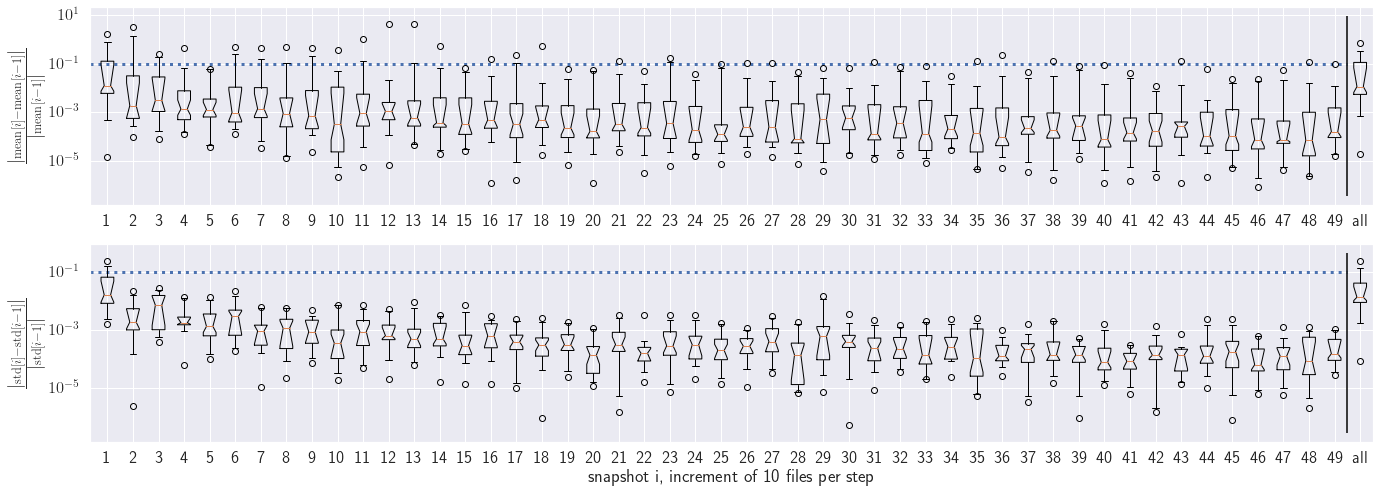

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(23,8))
axs[0].boxplot(list(running_diff_mean.values), notch=True, bootstrap=10000, whis=(5, 95))
# axs[0].set_title(f'\text{VAR_TYPE}{CONE_TYPE_STR}')
axs[0].set_ylabel(r'$\frac{\Big|\mathrm{mean}[i] - \mathrm{mean}[i-1]\Big|}{\Big|\mathrm{mean}[i-1]\Big|}$')
axs[0].set_yscale('log')
axs[0].set_xlim(.3, axs[0].get_xlim()[1])
axs[0].set_xticks(list(range(1, n_snapshots+1)))
axs[0].set_xticklabels(list(range(1, n_snapshots))+['all'])
axs[0].hlines(.1, axs[0].get_xlim()[0], axs[0].get_xlim()[1]-1, ls=':', linewidth=3, label='10\% level')
axs[0].vlines(49.5, *axs[0].get_ylim(), 'black', linewidth=1.5)
#
axs[1].boxplot(list(running_diff_std.values), notch=True, bootstrap=10000, whis=(5, 95))
axs[1].set_ylabel(r'$\frac{\Big|\mathrm{std}[i] - \mathrm{std}[i-1]\Big|}{\Big|\mathrm{std}[i-1]\Big|}$')
axs[1].set_yscale('log')
axs[1].set_xlabel(f'snapshot i, increment of {N_FILES_PER_STEP} files per step')
axs[1].set_xlim(.3, axs[1].get_xlim()[1])
axs[1].set_xticks(list(range(1, n_snapshots+1)))
axs[1].set_xticklabels(list(range(1, n_snapshots))+['all'])
axs[1].hlines(.1, axs[1].get_xlim()[0], axs[1].get_xlim()[1]-1, ls=':', linewidth=3, label='10\% level')
axs[1].vlines(49.5, *axs[1].get_ylim(), 'black', linewidth=1.5)
# plt.legend(loc='upper center')
plt.show()

## study outliers

In [18]:
snapshot_i = -2

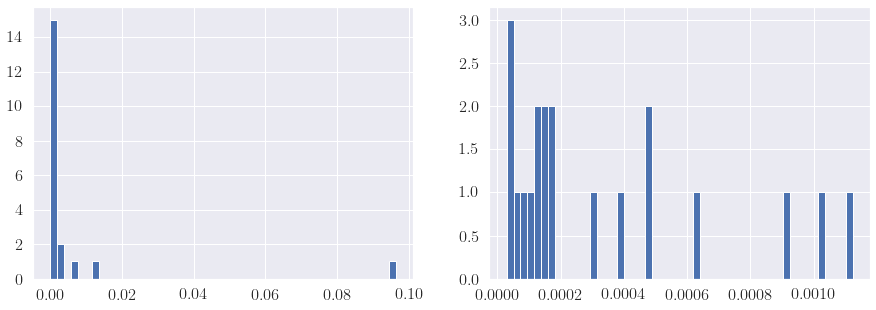

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(running_diff_mean.iloc[snapshot_i], bins=50,)#, range=(0, 1))
axs[1].hist(running_diff_std.iloc[snapshot_i], bins=50,)#, range=(0, 1))
plt.show()

In [20]:
running_diff_mean.iloc[snapshot_i][running_diff_mean.iloc[snapshot_i] > 0.05]

tau_dz    0.096343
Name: 48, dtype: float64

In [21]:
running_diff_std.iloc[snapshot_i][running_diff_std.iloc[snapshot_i] > 0.05]

Series([], Name: 48, dtype: float64)

In [22]:
# df_mean_dict[VAR_TYPE]['pfCand_gamma_dz_sig']

In [23]:
# df_std_dict[VAR_TYPE]['pfCand_gamma_dz_sig']